# ***Avaliação - 05***
---

## **Imagens de Teste**
---

In [19]:
import os

if not os.path.isdir('image_processing_tools'):
    !git clone https://github.com/kevinruiz182/image_processing_tools

## **Bibliotecas**
---

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def show(img, figsize=(20, 10)):
    if type(img) is list:
        if figsize is None:
            figsize = (5 * len(img), 8)

        fig, ax = plt.subplots(1, len(img), figsize=figsize)

        for i in range(len(img)):
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            ax[i].imshow(img[i], cmap="gray")
    else:
        fig = plt.figure(figsize=figsize)

        ax = fig.add_subplot(1, 1, 1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img, cmap="gray")

    plt.show()

In [22]:
def normalize(lab):
    norm = lab.copy()
    norm[..., 0] = norm[..., 0] / 100
    norm[..., 1] = (norm[..., 1] / 127 + 1) / 2
    norm[..., 2] = (norm[..., 2] / 127 + 1) / 2
    return norm

## **Questão 7**
---

In [23]:
# Image Path
img_path = './image_processing_tools/images/color_image_processing/bald_eagle_portrait.jpg'

# Load Image
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Convert Image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [24]:
# Convert Image to LAB
lab = cv2.cvtColor(img.astype('float32') / 255, cv2.COLOR_RGB2Lab)

In [25]:
# Parameters
sigma_c = 3
sigma_s = 4.25
iterations = 3
kernel_size = 5

# Apply a Bilateral Filter to the LAB Image
for i in range(iterations):
    lab = cv2.bilateralFilter(lab, kernel_size, sigma_c, sigma_s)

In [26]:
# Constants
MAX_LEVELS = 100

# Parameters
levels = 10
step = MAX_LEVELS / levels

# Split the LAB Image into Channels
l, a, b = cv2.split(lab)

# Quantize the luminance of the LAB Image
q = np.floor(l / step) * step

In [27]:
# Parameters
lower_threshold = 40
upper_threshold = 70

# Get the Edges of the Image
edges = 1 - cv2.Canny(l.astype('uint8'), lower_threshold, upper_threshold) // 255

# Convert to float32
edges = edges.astype('float32')

In [28]:
# Mask Luminance
mask_luminance = lambda l, m: l * m

# Apply Mask
new_l = mask_luminance(q, edges)

# Create a New LAB Image
lab = cv2.merge([new_l, a, b])

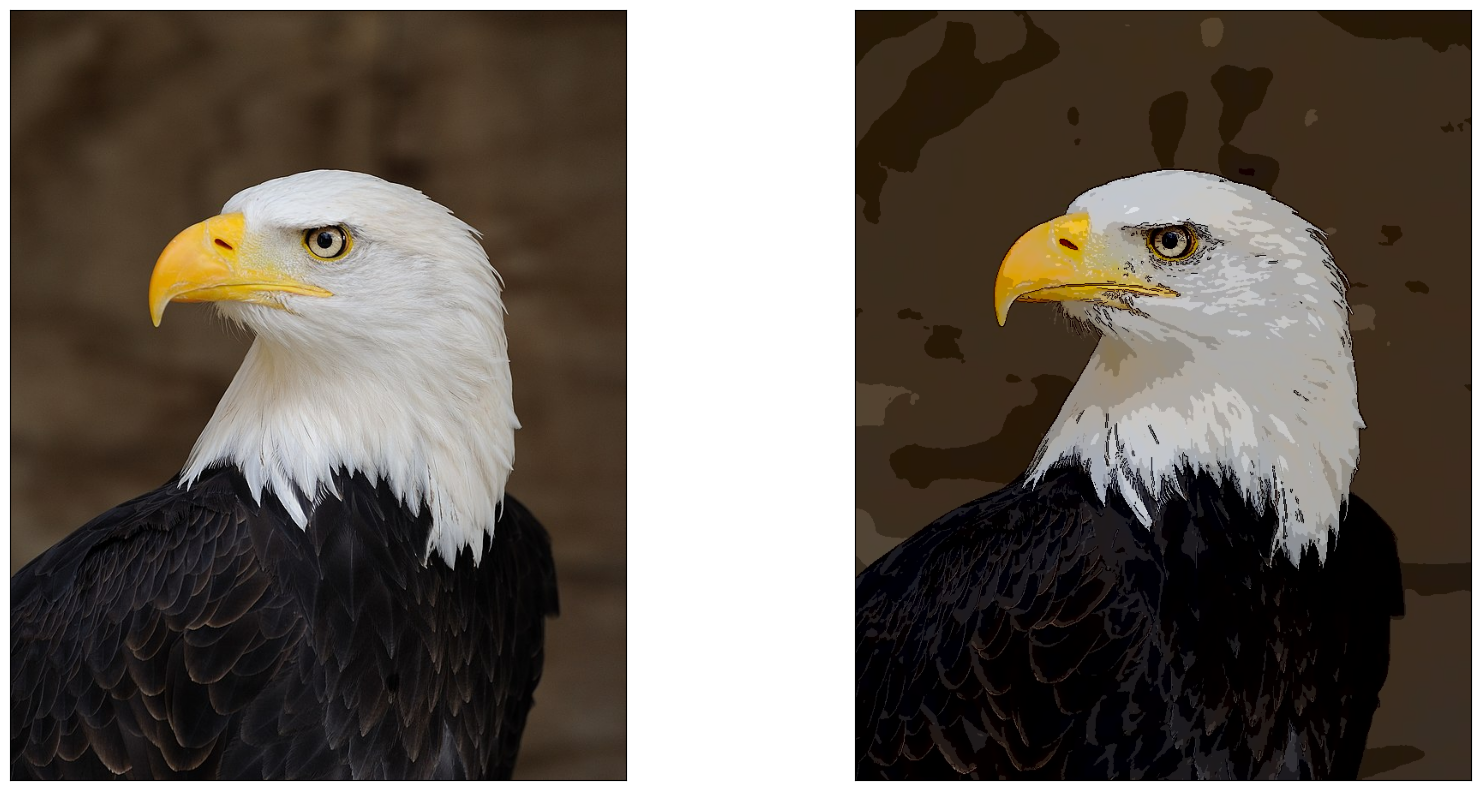

In [29]:
# Convert the LAB Image to RGB
cartoon = cv2.cvtColor(lab, cv2.COLOR_Lab2RGB)

# Show Images
show([img, cartoon])

In [30]:
# Split the RGB Image into Channels
r, g, b = cv2.split(cartoon)

# Calculate the Average Intensity for R, G and B
np.mean(r), np.mean(g), np.mean(b)

(0.25279146, 0.2147437, 0.17650017)